# Predicting Vehicle Emission using Linear & Ridge-Lasso

# Author- Rohan Kulkarni

In [84]:
import pandas as pd
import numpy as np

In [85]:
df=pd.read_csv(r'E:/Imarticus/5.LINEAR REGRESSION/train.csv')

In [86]:
df

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [87]:
df.isnull().sum().sort_values(ascending=False).head(50)

X385    0
X132    0
X123    0
X124    0
X125    0
X126    0
X127    0
X128    0
X129    0
X130    0
X131    0
X133    0
X120    0
X134    0
X135    0
X136    0
X137    0
X138    0
X139    0
X140    0
X141    0
X142    0
X122    0
X119    0
X96     0
X107    0
X98     0
X99     0
X100    0
X101    0
X102    0
X103    0
X104    0
X105    0
X106    0
X108    0
X118    0
X109    0
X110    0
X111    0
X112    0
X113    0
X114    0
X115    0
X116    0
X117    0
X143    0
X144    0
X145    0
X180    0
dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [89]:
df.select_dtypes(include='object')

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


In [90]:
from sklearn.preprocessing import LabelEncoder

In [91]:
le=LabelEncoder()

In [92]:
df[df.select_dtypes(include=['object']).columns]=df[df.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int32(8), int64(369)
memory usage: 12.0 MB


In [94]:
df.drop(columns='ID',inplace=True)

In [95]:
import seaborn as sns

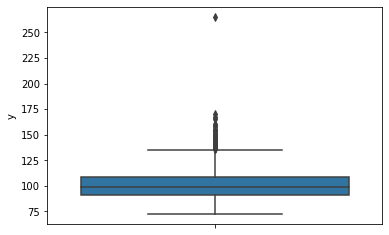

In [96]:
sns.boxplot(y='y',data=df)

In [97]:
df

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,32,23,17,0,3,24,9,14,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,32,21,19,4,3,28,11,14,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,20,24,34,2,3,27,9,23,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,20,21,34,5,3,27,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,20,23,34,5,3,12,3,13,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,107.39,8,20,16,2,3,0,3,16,0,...,1,0,0,0,0,0,0,0,0,0
4205,108.77,31,16,40,3,3,0,7,7,0,...,0,1,0,0,0,0,0,0,0,0
4206,109.22,8,23,38,0,3,0,6,4,0,...,0,0,1,0,0,0,0,0,0,0
4207,87.48,9,19,25,5,3,0,11,20,0,...,0,0,0,0,0,0,0,0,0,0


### Sampling

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
df_train,df_test = train_test_split(df,test_size=.2,random_state=100)

In [129]:
df_train_x=df_train.iloc[:,1:]
df_train_y=df_train.iloc[:,0]

df_test_x=df_test.iloc[:,1:]
df_test_y=df_test.iloc[:,0]


In [130]:
from sklearn.linear_model import LinearRegression

In [131]:
lr=LinearRegression()

In [132]:
lr.fit(df_train_x,df_train_y)

LinearRegression()

In [133]:
pred_train=lr.predict(df_train_x)

In [134]:
pred_test=lr.predict(df_test_x)

In [135]:
lr.coef_

array([ 4.06081928e-02, -1.40443736e-02,  3.72435260e-02,  5.41073218e-02,
        1.99237049e-01, -3.54942664e-02, -4.84249385e-02, -3.51739280e-03,
        4.00283036e+10,  5.02256439e+10,  4.00283036e+10, -4.15916187e+10,
        4.00283036e+10,  2.94534332e+11,  4.00283036e+10, -8.28501263e+10,
        4.00283036e+10,  4.00283036e+10,  4.00283036e+10, -1.14812107e+11,
        4.00283036e+10,  4.00283036e+10, -9.96619567e+08,  4.00283036e+10,
       -3.91710758e-01,  4.00283036e+10, -3.73927535e+10,  4.00283036e+10,
        2.66580109e+11,  4.00283036e+10,  4.04938766e+10,  4.00283037e+10,
       -1.42289972e+11,  4.00283036e+10, -1.24290136e+11, -9.94600177e-01,
        4.24585604e+10, -1.34929248e+10, -1.34929248e+10,  2.21892089e+00,
       -1.96685322e+00, -3.67576953e+09, -4.64799309e+00,  1.81180239e-01,
        7.34158702e+00, -8.80033336e+10,  4.57780838e+00, -1.46630287e-01,
        4.07450199e-01,  1.60509156e+11,  2.61465388e+11, -1.77580219e+11,
       -1.81604791e+00, -

In [136]:
lr.intercept_

1437595931489.8418

In [137]:
column_coef=pd.DataFrame({'Columns':df_train_x.columns , 'coeficients':lr.coef_})
column_coef

,Columns,coeficients
0,X0,4.060819e-02
1,X1,-1.404437e-02
2,X2,3.724353e-02
3,X3,5.410732e-02
4,X4,1.992370e-01
...,...,...
371,X380,-9.966196e+08
372,X382,-2.267675e+10
373,X383,-2.691166e-01
374,X384,2.315819e+00


In [138]:
# R2 Score
lr.score(df_train_x,df_train_y)

0.7108145902069427

### Error Terms & plots

In [139]:
error_train=df_train_y - pred_train
error_test=df_test_y - pred_test

In [140]:
error_train.mean()

-0.00010965825457091026

In [141]:
error_test.mean()

-175625862.25143155

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

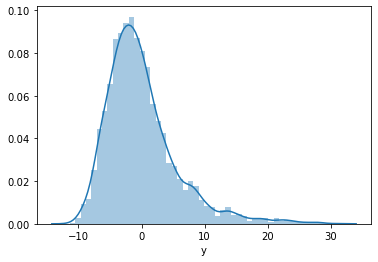

In [143]:
sns.distplot(error_train)

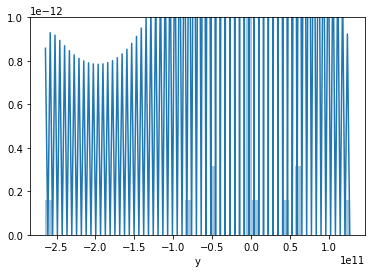

In [144]:
sns.distplot(error_test)

Text(0.5, 1.0, 'Scatter plot on error Terms')

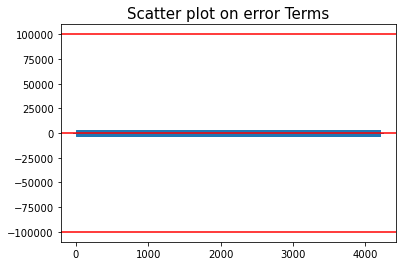

In [145]:
plt.plot(error_train,'+')
plt.axhline(y = error_train.mean(), color='r')
plt.axhline(y =  100000, color='r')
plt.axhline(y = -100000, color='r')
plt.title('Scatter plot on error Terms',size=15)

Text(0.5, 1.0, 'Scatter plot on error Terms')

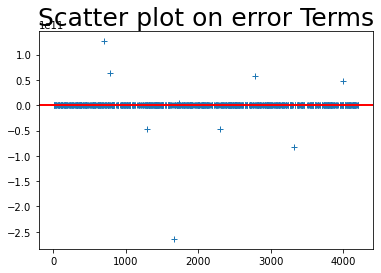

In [146]:
plt.plot(error_test,'+')
plt.axhline(y = error_test.mean(), color='r')
plt.axhline(y =  10, color='r')
plt.axhline(y = -10, color='r')
plt.title('Scatter plot on error Terms',size=25)

In [147]:
pred_actual=pd.DataFrame({ 'Pred': pred_train, 'Actual': df_train_y})

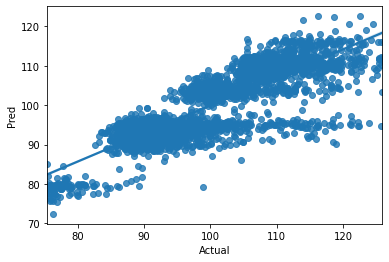

In [148]:
sns.regplot(pred_actual.Actual,pred_actual.Pred)

### Metrics

#### MSE

In [149]:
MSE=np.mean(np.square(error_test))
MSE

1.3229382571958324e+20

#### RMSE

In [150]:
RMSE=np.sqrt(MSE)
RMSE

11501905308.234077

#### MAE

In [151]:
MAE=np.mean(np.abs(error_test))
MAE

918568559.1708642

#### MAPE

In [152]:
MAPE=np.round(np.mean(np.abs(error_test *100/ df_test_y)))
MAPE

1015627758.0

### Lets remove the outliers

In [124]:
def remove_outliers(df, col, k=2):
    mean= df[col].mean()
    global df1
    sd=df[col].std()
    final_list=[x for x in df[col] if (x > mean-k*sd)]
    final_list=[x for x in final_list if (x < mean + k*sd)]
    df1=df.loc[df[col].isin(final_list)]; print(df1.shape)
    print("Number of outliers removed-->", df.shape[0]-df1.shape[0])

In [125]:
remove_outliers(df,'y',k=2)

(4034, 377)
Number of outliers removed--> 175


In [126]:
df=df1

## LASSO regression

In [153]:
from sklearn.linear_model import Lasso

In [154]:
la=Lasso()

In [155]:
la.fit(df_train_x,df_train_y)

Lasso()

In [156]:
pred_la_train=la.predict(df_train_x)

In [157]:
pred_la_test=la.predict(df_test_x)

In [158]:
la.score(df_train_x,df_train_y)

0.48266252186113334

In [159]:
error_test_la=df_test_y - pred_la_test

In [171]:
MSE_la=np.mean(np.square(error_test_la))
MSE_la

57.64355360794356

In [172]:
RMSE_la=np.sqrt(MSE_la)
RMSE_la

7.592335188065893

In [173]:
MAPE_la=np.round(np.mean(np.abs(error_test_la *100/ df_test_y)))
MAPE_la

6.0

In [170]:
acc=100-MAPE_la
acc

94.0

# With CV in Ridge & Lasso

In [165]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

In [166]:
aa= np.arange(0,25,  .01) ## aa -> Lambda(values from 0 to 25 with the spaces of 0.01)
parameters= {'alpha':aa}

In [168]:
lasso=Lasso()

In [169]:
lasso_regressor=GridSearchCV(lasso, param_grid=parameters)
lasso_regressor.fit(df_train_x,df_train_y)

C:\Users\_RoXstaR_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\_RoXstaR_\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\_RoXstaR_\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40447.3298102315, tolerance: 28.416863195931807
  model = cd_fast.enet_coordinate_descent(
C:\Users\_RoXstaR_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegre

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([0.000e+00, 1.000e-02, 2.000e-02, ..., 2.497e+01, 2.498e+01,
       2.499e+01])})

In [174]:
lasso_regressor.best_estimator_

Lasso(alpha=0.02)

In [175]:
lasso1=Lasso(alpha=0.02)

In [176]:
lasso1.fit(df_train_x,df_train_y)

Lasso(alpha=0.02)

In [179]:
lasso1.score(df_train_x,df_train_y)

0.6928594869811495

In [180]:
lasso1_pred=lasso1.predict(df_test_x)

In [182]:
error_test_lasso1=df_test_y - lasso1_pred

In [183]:
MSE_lasso1=np.mean(np.square(error_test_lasso1))
MSE_lasso1

40.73479061206954

In [184]:
RMSE_lasso1=np.sqrt(MSE_lasso1)
RMSE_lasso1

6.382381265019314

In [185]:
MAPE_lasso1=np.round(np.mean(np.abs(error_test_lasso1 *100/ df_test_y)))
MAPE_lasso1

5.0

In [186]:
acc=100-MAPE_lasso1
acc

95.0

## Linear SGDRegressor.... gredient Decient

In [214]:
from sklearn.linear_model import SGDRegressor

In [215]:
lin_model=SGDRegressor()

In [216]:
from sklearn import preprocessing # using preprocessing to make data unitless , mean=0,sd=1,we are scaling the data

In [217]:
df_train_x = preprocessing.scale(df_train_x) #@ scaling of X is mandatory
#df_train_y = preprocessing.scale(df_train_y) # don't scale Y

In [218]:
lin_model.fit(df_train_x,df_train_y)

SGDRegressor()

In [219]:
pred_sgd=lin_model.predict(df_test_x)

In [220]:
lin_model.coef_

array([-2.88102903e+08,  6.78560237e+08,  3.87788763e+08,  5.22386179e+08,
       -8.99835670e+07,  9.48164637e+07,  1.75519915e+09,  1.51087227e+08,
       -1.26981823e+08,  0.00000000e+00,  3.80467497e+08,  3.92494766e+08,
       -4.59781384e+08, -1.43563663e+08, -4.18198275e+08, -4.00645875e+08,
        1.09082083e+09, -1.76751556e+08,  5.20864357e+08,  2.45292438e+09,
       -2.68928138e+08,  4.00686274e+08,  2.43552746e+09,  5.76012478e+08,
        4.11158048e+08,  1.03209498e+08, -7.64957676e+07, -6.92135659e+08,
        3.56573055e+08, -5.61047003e+08,  0.00000000e+00,  5.14941929e+08,
        3.56573055e+08,  5.35343230e+08,  3.56573055e+08, -1.34628704e+08,
        0.00000000e+00,  2.16563703e+08, -1.07841200e+09,  1.94781175e+08,
        5.61636139e+08, -4.84464137e+08, -2.09554003e+08, -1.02008532e+09,
       -8.35933815e+07,  3.42331810e+08,  2.55746090e+08, -9.22904303e+08,
        1.52568777e+08,  1.51991650e+08, -3.92184422e+08, -7.64957676e+07,
       -1.96173082e+09, -

In [221]:
lin_model.intercept_

array([1.04968647e+09])

In [224]:
lin_model.score(df_train_x,   df_train_y) # R2 score is negative coz of the Nature of the data,

-4.892696072832087e+21